# Knapsack

In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

In [2]:
# Import external librarires
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import our code
from objfun_tsp import TSPGrid

## Knapsack problem

### Description

* Input: nonnegative numbers $p_1, \dots, p_n, a_1, \dots, a_n, W$
* The aim is to maximize the sum 

$$\mathrm{max}\sum_{j = 1}^np_jx_j$$

* while the condition holds true:

$$ \sum_{j = 1}^na_jx_j \leq W, $$

* where $x \in \{0,1\}^n$ if we talk about 0/1 Knapsack problem and $x \in (\mathbb{R}_0^+)^n$ if fractional Knapsack problem is considered.

## 0/1 Knapsack problem

* Firstly we aim our attention at 0/1 Knapsack problem. Meaning that only whole items can be added to the Knapsack.

In [3]:
from greedy2 import GreedyAlg2
of = GreedyAlg2()  

In [4]:
value = [50, 40, 30, 50, 30, 24, 36]
weight = [5, 4, 6, 3, 2, 6, 7]
TotalWeight = 20

optimal, Amatrix = of.greedy_0_1_dynamic(TotalWeight, weight, value);
print("Optimal value of the Knapsack is: {:.1f}".format(optimal))


Optimal value of the Knapsack is: 200.0


In [5]:
items = of.BackTracking(TotalWeight, weight, Amatrix)
print("Sorted items to be added to knapsack: {}".format(items))

Sorted items to be added to knapsack: [0, 1, 2, 3, 4]


## Simulated annealing for 0/1 Knapsack problem

### Algorithm

* Set feasibile solution to $X = [0, \dots , 0]$
* $c \leftarrow 0$
* $T \leftarrow T0$
* set best solution as initial feasible solution: $bestX \leftarrow X$
* while total number of steps $c_max$ is not reached repeat:
* choose random sample from knapsack
* if the weight limit is not reached or the value was already added do
* if the profit is increased and is better than the best reached so far set bestX = X, otherwise generate random number uniformly from (0,1) and if is lower that $e^{(P(Y)-P(X))/T}$ than remove the item from knapsack
* set c = c+1 (move one step forward)
* update temperature $T = T*alpha$

### Simulated annealing for diffent number of steps for reaching optimum and different values of cooling parameter

In [7]:
counter = 0
value = [50, 40, 30, 50, 30, 24, 36]
weight = [5, 4, 6, 3, 2, 6, 7]
TotalWeight = 20
alpha = [0.95, 0.98, 0.999]
numSteps = [1000, 5000, 10000]
results = np.zeros((len(alpha)*len(numSteps), 6))

for numS in range(len(numSteps)):
    
    for alp in range(len(alpha)):
        result = []
        stepsToOptimum = []
        for j in range(20):
            items_SA, optimal_SA, temperature, st = of.KnapsackSA(value, weight, TotalWeight, alpha[alp], 1000, 1000)
            result.append(optimal_SA)
            stepsToOptimum.append(st)
        results[counter,:] = [numSteps[numS], alpha[alp], min(result), max(result), np.mean(result), np.mean(stepsToOptimum)]
        counter += 1
    
    
pd.DataFrame(results, columns=['steps','alpha','min', 'max', 'avg', 'avg number of steps for reaching optimum'])

,steps,alpha,min,max,avg,avg number of steps for reaching optimum
0,1000.0,0.950,156.0,200.0,188.7,576.00
1,1000.0,0.980,194.0,200.0,198.8,284.05
2,1000.0,0.999,200.0,200.0,200.0,137.40
3,5000.0,0.950,156.0,200.0,194.8,292.75
4,5000.0,0.980,176.0,200.0,197.9,301.40
5,5000.0,0.999,200.0,200.0,200.0,153.55
6,10000.0,0.950,156.0,200.0,191.9,520.45
7,10000.0,0.980,176.0,200.0,198.2,232.90
8,10000.0,0.999,200.0,200.0,200.0,181.80


It is obvious that with increasing value of cooling parameter alpha, the optimum is reached more easily. For value alpha = 0.999 and number of runs equal 20, optimum was reached 20 times. From the table above it can be also observed that average number of steps needed for reaching and optimum is increasing with decreasing value of cooling parameter alpha, i.e. is higher for faster cooling. 

### Temperature course with respect to cooling parameter alpha 

<IPython.core.display.Javascript object>


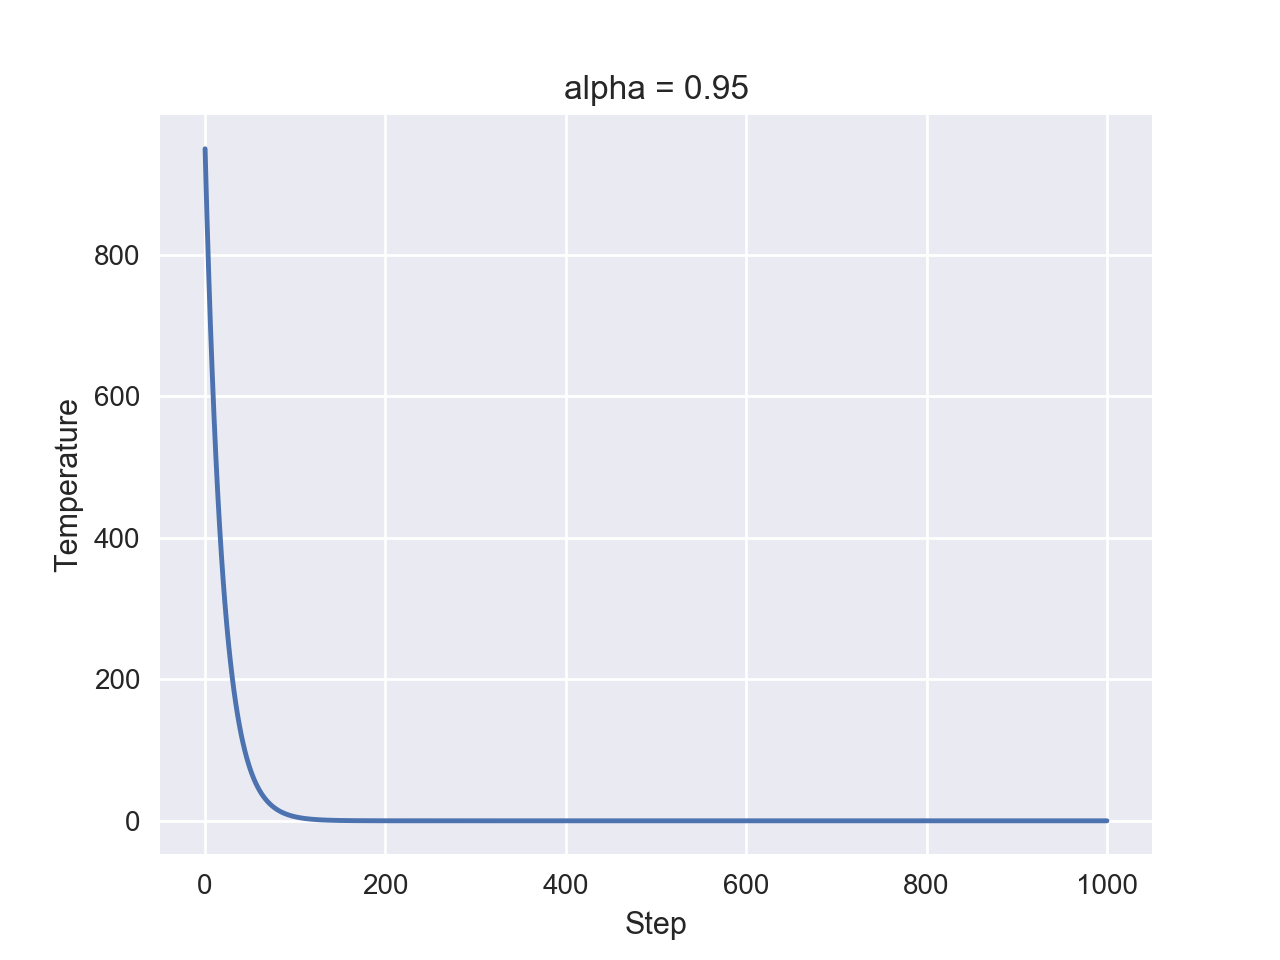

In [8]:
import matplotlib.pyplot as plt
items_SA, optimal_SA, temperature, st = of.KnapsackSA(value, weight, TotalWeight, 0.95, 1000, 1000)
plt.plot(temperature)
plt.ylabel('Temperature')
plt.xlabel('Step')
plt.title('alpha = 0.95')
plt.show()

<IPython.core.display.Javascript object>


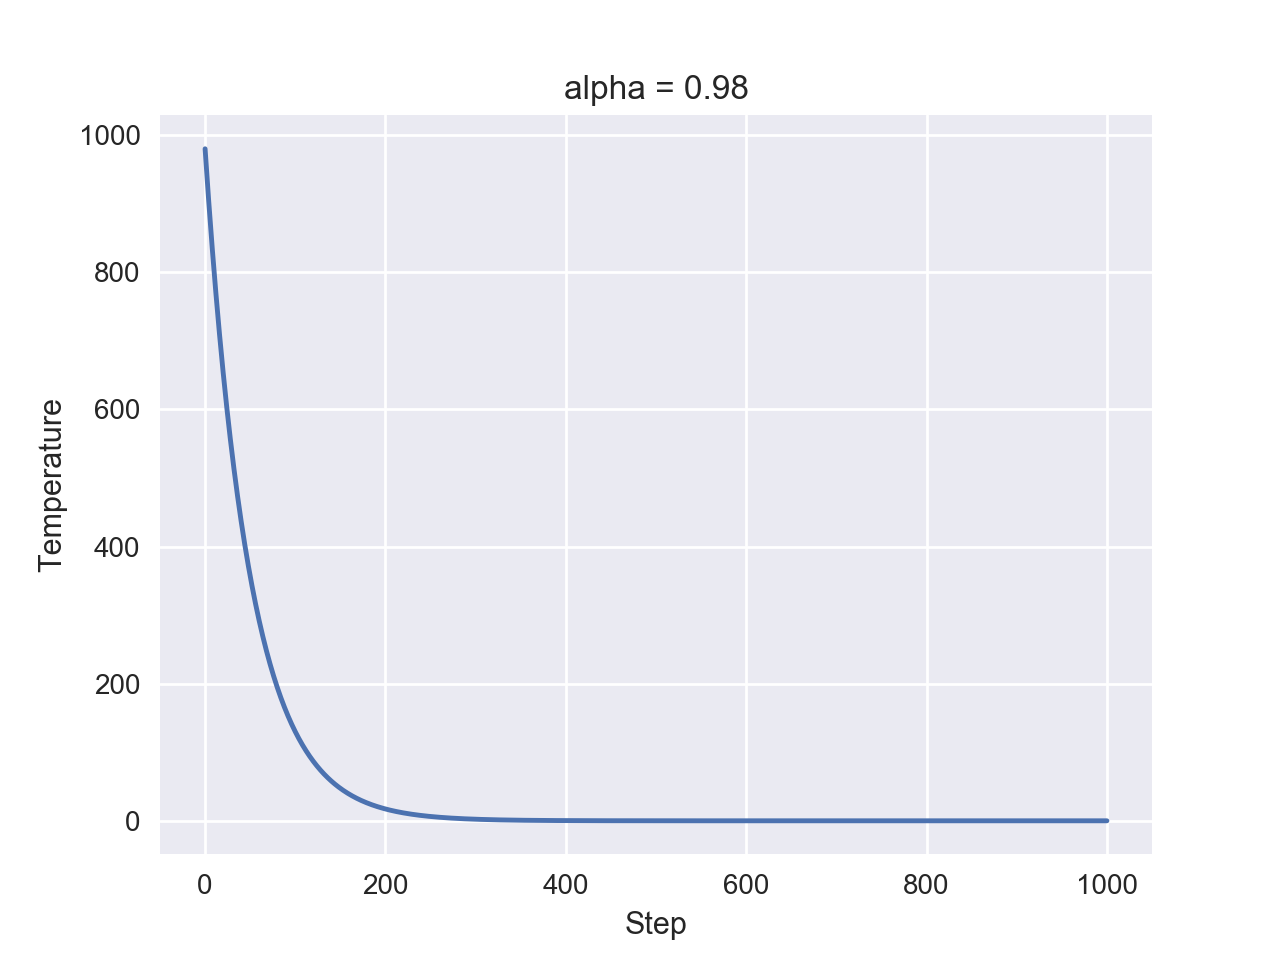

In [9]:
items_SA, optimal_SA, temperature, st = of.KnapsackSA(value, weight, TotalWeight, 0.98, 1000, 1000)
plt.plot(temperature)
plt.ylabel('Temperature')
plt.xlabel('Step')
plt.title('alpha = 0.98')
plt.show()

<IPython.core.display.Javascript object>


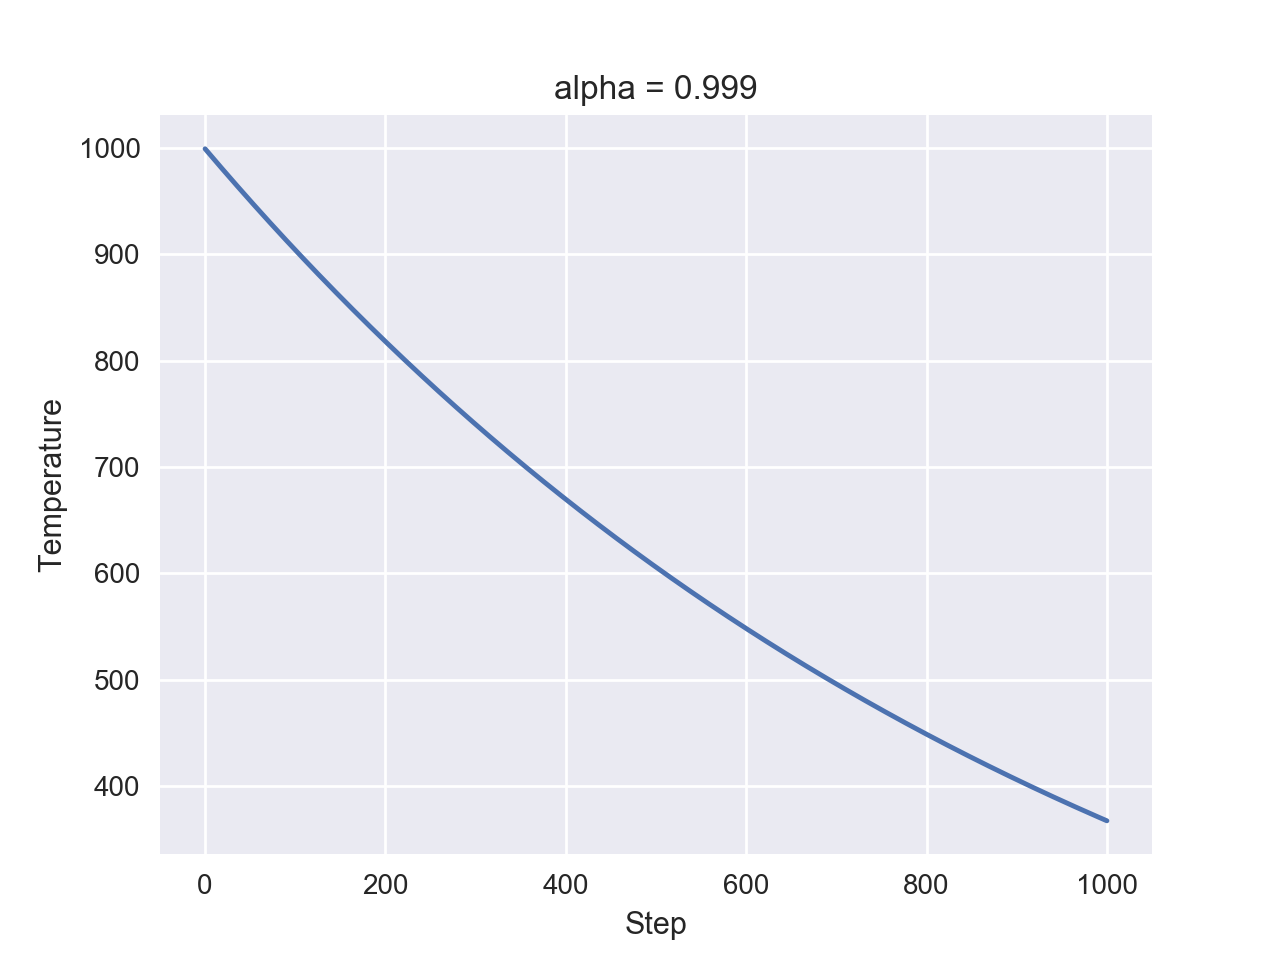

In [11]:
items_SA, optimal_SA, temperature, st = of.KnapsackSA(value, weight, TotalWeight, 0.999, 1000, 1000)
plt.plot(temperature)
plt.ylabel('Temperature')
plt.xlabel('Step')
plt.title('alpha = 0.999')
plt.show()

Figures suggest that with increasing value of cooling parameter alpha the temperature decrease with step of algorithm is slower. Therefore the cooling is slower.

Above results support hypothesis that in this problem slower cooling yields better results.

## Tabu search for 0/1 Knapsack problem

### Algorithm

* $c = 1$
* generate random solution $X$
* calculate weight of Knapsack for solution $X$
* bestX = X
* tabuList = randint(0, n)

* **while** $c \leq c_{max}$
    * N = {0, 1, ... , n-1}
    * start = max(0, c-L)
    * for j in [start, c)
        * remove tabuList(j) from N
    * for $i \in N$
        * if X(i)==0 & CurW + weight(i) > TotalWeight
            * remove i from N
    * if N = []
        * break
    * i = $argmax\left((-1)^{X}\frac{value}{weight}\right)$ for $i \in N$
    * add i to tabuList
    * X(i) = 1-X(i)
    * if X(i) == 1
        * CurW = CurW + weight(i)
    * else
        * CurW = CurW - weight(i)
    * if sum(X*value) > sum(bestX*value)
        * update best feasible solution bestX = X
    * c += 1
* return bestX, sum(bestX*value)

Firstly we test the algorithm on our usual example. Results are identical to those obtained by simulated annealing and greedy algorithm, i.e. optimal value/profit reached is equal to 200. Items are know shuffled but comparing the chosen weights and values with the ones from SA confirms our expectation that the results are identical.

In [12]:
value = [50, 40, 30, 50, 30, 24, 36]
weight = [5, 4, 6, 3, 2, 6, 7]
TotalWeight = 20
cmax = 200
L = 1

FinalItems, FinalValue, valueS,  weightS = of.KnapsackTS(value, weight, TotalWeight, cmax, L)

print("Items to be added to knapsack: {}".format(FinalItems))
print("Corresponding shuffled weights: {}".format(weightS))
print("Corresponding shuffled values: {}".format(valueS))
print("Optimal value of the Knapsack is: {:.1f}".format(FinalValue))

Items to be added to knapsack: [ 1.  1.  1.  0.  1.  0.  1.]
Corresponding shuffled weights: (3, 6, 4, 7, 5, 6, 2)
Corresponding shuffled values: (50, 30, 40, 36, 50, 24, 30)
Optimal value of the Knapsack is: 200.0


Now we test the algorithm for different values of repetition parameter L, which has following meaning: if we remove/add specific item from/to Knapsack for L runs this item cannot be added/removed to/from Knapsack.

In [13]:
value = [135, 139, 149, 150, 156, 163,173, 184, 192, 201, 210, 214, 221, 229, 240];
weight = [70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120];
TotalWeight = 750
cmax = 200

Lvalues = [1, 2, 3, 4, 5, 6, 7, 8]
results = np.zeros((len(Lvalues), 5))

for L in range(len(Lvalues)):
    result = []
    for alp in range(25):
        items, optimal, value, weight = of.KnapsackTS(value, weight, TotalWeight, cmax, Lvalues[L])
        result.append(optimal)
    numOfOptimal = sum(1 for x in result if x == 1458)
    results[L,:] = [Lvalues[L], min(result), max(result), np.mean(result), numOfOptimal]
    
    
pd.DataFrame(results, columns=['L','min', 'max', 'avg', 'number of found optimal solutions'])



,L,min,max,avg,number of found optimal solutions
0,1.0,1458.0,1458.0,1458.00,25.0
1,2.0,1458.0,1458.0,1458.00,25.0
2,3.0,1452.0,1458.0,1456.64,18.0
3,4.0,1448.0,1458.0,1453.92,8.0
4,5.0,1441.0,1458.0,1456.64,23.0
5,6.0,1448.0,1458.0,1455.56,13.0
6,7.0,1452.0,1458.0,1457.28,21.0
7,8.0,1443.0,1458.0,1452.76,8.0


Results suggest that algorithm performs better for smaller values of $L$, where optimum was reached in 25 out of 25 runs of the algorithm for $L \in \{1,2\}$. So in this case it would be optimal to choose $L$ from the set $\{1,2\}$. Advantage of Tabu search is that the best feasible solution is found very early, therefore maximum number of steps of the algorithm can be taken pretty small $c_{max} = 200$ (in comparison to simulated annealing).

## Fractional Knapsack problem

* Now we are interested in fractional Knapsack problem. Meaning that fractions of items can be added to the Knapsack.


### Algorithm

* Assume knapsack holds weight $W$ and items have value $value_i$ and weights $weight_i$
* Sort items by value/weight ration: $\frac{value_i}{weight_i}$ in descending order
* Take the item with highest ratio if the weight limit is not exceeded otherwise take $\frac{W-load}{w_i}$ where load is weight of items already added to the knapsack
* Continue unless weight limit or number of items is reached\


In [14]:
value = [50, 40, 30, 50, 30, 24, 36]
weight = [5, 4, 6, 3, 2, 6, 7]
TotalWeight = 20

optimal = of.knapsack_fractional(TotalWeight, weight, value)
print("Optimal value of the Knapsack is: {:.1f}".format(optimal))


Optimal value of the Knapsack is: 200.9


#### The above results suggest that the highest value of the Knapsack was obtained by Fractional Knapsack.  For 0/1 Knapsack both methods (greedy dynamic and simulated annealing) has shown the same result .

## Comparison of methods used

In [15]:
results = []
for j in range(10):
    weight, value, TotalWeight = of.generate_problem( 6, 5, 15, 10, 100, 20, 25)
    
    optimalGreedy, Amatrix = of.greedy_0_1_dynamic(TotalWeight, weight, value)
    items_SA, optimal_SA, temperature, st = of.KnapsackSA(value, weight, TotalWeight, 0.9999, 1000, 20000)
    optimalFractional = of.knapsack_fractional(TotalWeight, weight, value)
    FinalItems, FinalValue, valueS,  weightS = of.KnapsackTS(value, weight, TotalWeight, 300, 1)
    
    results.append([j, optimalGreedy, optimal_SA ,FinalValue, optimalFractional])

pd.DataFrame(results, columns=['run', 'greedy', 'SA','TS',  'fractional'])

,run,greedy,SA,TS,fractional
0,0,217.0,217.0,217.0,250.214286
1,1,225.0,225.0,225.0,248.571429
2,2,188.0,188.0,188.0,204.857143
3,3,160.0,160.0,160.0,189.230769
4,4,193.0,193.0,193.0,213.230769
5,5,160.0,160.0,151.0,203.111111
6,6,164.0,164.0,164.0,178.000000
7,7,170.0,170.0,170.0,205.181818
8,8,167.0,167.0,167.0,209.000000
9,9,121.0,121.0,113.0,137.333333


From the table above, it is obvious that fractional Knapsack is giving the best results in all conducted runs. Eventhough we cannot compare the algorithms directly since fractional Knapsack is different heuristics, we can conclude that if we allowed fractions of items (fractional Knapsack) the optimal value would be higher. All other method are then giving the same results. Greedy algorithm is giving identical results as SA and tabu search for initial conditions generated above. 

Based on the statistics conducted separately for TS and SA i would choose TS algorithm over SA since number of steps required for reaching the optimum is significantly lower than for SA. 

# References

[1] Donald L. Kreher, Douglas R. Stinson: Combinatorial Algorithms: Generation, Enumeration, and Search